In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error
import csv
from datetime import datetime

In [25]:
# 1. Đọc dữ liệu từ file CSV
file_path = 'D:\\visua stiudio xanh\\hocki_3\\laptirnh_py\\K215480106043_NguyenVanSong_BaiTap-KhoaHocDuLieu_21-4\\bai2\\Data_Number_4.csv'  # Thay thế đường dẫn file của bạn

# Mảng chứa dữ liệu
coordinates = []
pm25_levels = []
temperature = []
humidity = []
wind_speed = []

# Đọc file CSV
with open(file_path, mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Bỏ qua header
    for row in csv_reader:
        coordinates.append([float(row[1]), float(row[2])])  # Lưu tọa độ x, y
        pm25_levels.append(float(row[3]))  # Lưu nồng độ PM2.5
        temperature.append(float(row[4]))  # Lưu nhiệt độ
        humidity.append(float(row[5]))  # Lưu độ ẩm
        wind_speed.append(float(row[6]))  # Lưu tốc độ gió

# Chuyển đổi các danh sách thành NumPy arrays
coordinates = np.array(coordinates)
pm25_levels = np.array(pm25_levels)
temperature = np.array(temperature)
humidity = np.array(humidity)
wind_speed = np.array(wind_speed)

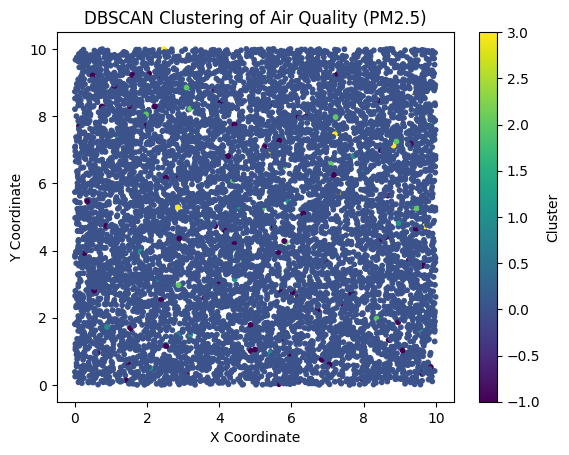

In [26]:
# 2. Phân cụm bằng DBSCAN
data_for_clustering = np.column_stack([coordinates, pm25_levels])  # Dữ liệu gồm tọa độ và nồng độ PM2.5

# Áp dụng thuật toán DBSCAN
dbscan = DBSCAN(eps=5, min_samples=10)
labels = dbscan.fit_predict(data_for_clustering)

# Vẽ kết quả phân cụm
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis', s=10)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('DBSCAN Clustering of Air Quality (PM2.5)')
plt.colorbar(label='Cluster')
plt.show()

In [27]:
# 3. Tính toán chỉ số rủi ro ô nhiễm
def calculate_pollution_risk(pm25_levels, threshold=50):
    mean_pm25 = np.mean(pm25_levels)  # Nồng độ PM2.5 trung bình
    freq_above_threshold = np.sum(pm25_levels > threshold) / len(pm25_levels)  # Tần suất vượt ngưỡng
    risk = mean_pm25 * freq_above_threshold  # Chỉ số rủi ro ô nhiễm
    return risk

# Tính chỉ số rủi ro ô nhiễm
pollution_risk = calculate_pollution_risk(pm25_levels)
print(f"Pollution Risk Index: {pollution_risk}")

Pollution Risk Index: 5.918746345875186


In [28]:
# 4. Tạo đặc trưng "chỉ số thời tiết bất lợi"
def calculate_weather_risk(temperature, humidity, wind_speed):
    # Giả sử công thức tính chỉ số thời tiết bất lợi như sau
    return (humidity * 0.6 + wind_speed * 0.4)  # Đơn giản hóa công thức

# Tính chỉ số thời tiết bất lợi
weather_risk = calculate_weather_risk(temperature, humidity, wind_speed)
print(f"Weather Risk Index: {weather_risk}")

Weather Risk Index: [40.9  61.42 40.34 ... 21.66 16.26 49.88]


In [29]:
# 5. Tạo đặc trưng "xu hướng ô nhiễm"
def calculate_pollution_trend(pm25_levels):
    trend = np.gradient(pm25_levels)  # Tính độ dốc của PM2.5
    return trend

# Tính xu hướng ô nhiễm
pollution_trend = calculate_pollution_trend(pm25_levels)
print(f"Pollution Trend: {pollution_trend}")

Pollution Trend: [  27.09837712   32.58668255  -15.10007157 ...   27.54705437  -17.2787784
 -116.38642462]


RMSE: 5.7705015293264


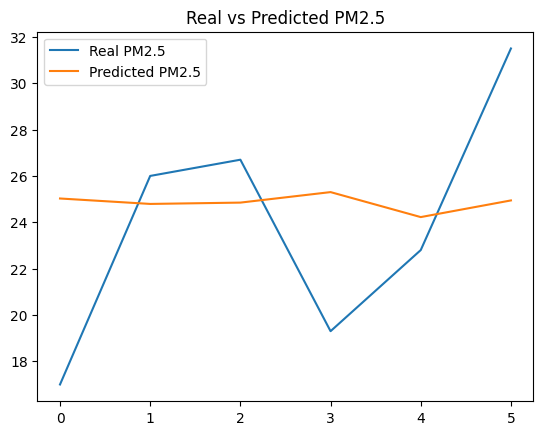

In [30]:
# 6. Mô phỏng mô hình Linear Regression (sử dụng thay vì LSTM)
from sklearn.linear_model import LinearRegression

def prepare_lstm_data(data, lookback=24, forecast=6):
    X, y = [], []
    for i in range(len(data) - lookback - forecast):
        X.append([row[3] for row in data[i:i+lookback]])  # Sử dụng nồng độ PM2.5 làm đầu vào
        y.append([row[3] for row in data[i+lookback:i+lookback+forecast]])  # Dự đoán nồng độ PM2.5
    return np.array(X), np.array(y)

# Chuyển đổi dữ liệu cho mô hình
lookback = 24
forecast = 6
X, y = prepare_lstm_data(np.column_stack([coordinates, pm25_levels, temperature, humidity, wind_speed]), lookback, forecast)

# Tạo mô hình Linear Regression
model = LinearRegression()
model.fit(X, y)  # Huấn luyện mô hình

# Dự đoán PM2.5
y_pred = model.predict(X)

# Đánh giá mô hình bằng RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.plot(y[0], label='Real PM2.5')
plt.plot(y_pred[0], label='Predicted PM2.5')
plt.legend()
plt.title('Real vs Predicted PM2.5')
plt.show()